In [1]:
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import LSTM
from matplotlib import pyplot
from numpy import array
from pandas import DataFrame

/anaconda3/lib/python3.6/site-packages/h5py/__init__.py:34: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters
Using TensorFlow backend.


# Create Data

In [2]:
def get_train():
    seq = [[0.0, 0.1], [0.1, 0.2], [0.2, 0.3], [0.3, 0.4], [0.4, 0.5]]
    seq = array(seq)
    X, y = seq[:, 0], seq[:, 1]
    X = X.reshape(len(X), 1, 1)
    
    return X, y

In [3]:
def get_validation():
    seq = [[0.5, 0.6], [0.6, 0.7], [0.7, 0.8], [0.8, 0.9], [0.9, 1.0]]
    seq = array(seq)
    X, y = seq[:, 0], seq[:, 1]
    X = X.reshape(len(X), 1, 1)
    
    return X, y

# Train Model

### Underfitting (less epochs)

In [42]:
model_underfitting = Sequential()
model_underfitting.add(LSTM(10, input_shape=(1,1)))
model_underfitting.add(Dense(1, activation='linear'))

model_underfitting.compile(loss='mse', optimizer='adam', metrics=['accuracy'])

X, y = get_train()
val_X, val_y = get_validation()
history_underfitting = model_underfitting.fit(X, y, epochs=100, validation_data=(val_X, val_y), shuffle=False)

Train on 5 samples, validate on 5 samples
Epoch 1/100
5/5 [==============================] - 1s 232ms/step - loss: 0.1097 - acc: 0.0000e+00 - val_loss: 0.6583 - val_acc: 0.0000e+00
Epoch 2/100
5/5 [==============================] - 0s 1ms/step - loss: 0.1081 - acc: 0.0000e+00 - val_loss: 0.6529 - val_acc: 0.0000e+00
Epoch 3/100
5/5 [==============================] - 0s 1ms/step - loss: 0.1066 - acc: 0.0000e+00 - val_loss: 0.6476 - val_acc: 0.0000e+00
Epoch 4/100
5/5 [==============================] - 0s 1ms/step - loss: 0.1051 - acc: 0.0000e+00 - val_loss: 0.6422 - val_acc: 0.0000e+00
Epoch 5/100
5/5 [==============================] - 0s 2ms/step - loss: 0.1036 - acc: 0.0000e+00 - val_loss: 0.6369 - val_acc: 0.0000e+00
Epoch 6/100
5/5 [==============================] - 0s 1ms/step - loss: 0.1021 - acc: 0.0000e+00 - val_loss: 0.6316 - val_acc: 0.0000e+00
Epoch 7/100
5/5 [==============================] - 0s 1ms/step - loss: 0.1006 - acc: 0.0000e+00 - val_loss: 0.6263 - val_acc: 0.0000e+

5/5 [==============================] - 0s 1ms/step - loss: 0.0417 - acc: 0.0000e+00 - val_loss: 0.3898 - val_acc: 0.0000e+00
Epoch 61/100
5/5 [==============================] - 0s 1ms/step - loss: 0.0409 - acc: 0.0000e+00 - val_loss: 0.3861 - val_acc: 0.0000e+00
Epoch 62/100
5/5 [==============================] - 0s 1ms/step - loss: 0.0402 - acc: 0.0000e+00 - val_loss: 0.3824 - val_acc: 0.0000e+00
Epoch 63/100
5/5 [==============================] - 0s 1ms/step - loss: 0.0394 - acc: 0.0000e+00 - val_loss: 0.3787 - val_acc: 0.0000e+00
Epoch 64/100
5/5 [==============================] - 0s 2ms/step - loss: 0.0387 - acc: 0.0000e+00 - val_loss: 0.3751 - val_acc: 0.0000e+00
Epoch 65/100
5/5 [==============================] - 0s 1ms/step - loss: 0.0380 - acc: 0.0000e+00 - val_loss: 0.3715 - val_acc: 0.0000e+00
Epoch 66/100
5/5 [==============================] - 0s 1ms/step - loss: 0.0373 - acc: 0.0000e+00 - val_loss: 0.3679 - val_acc: 0.0000e+00
Epoch 67/100
5/5 [=============================

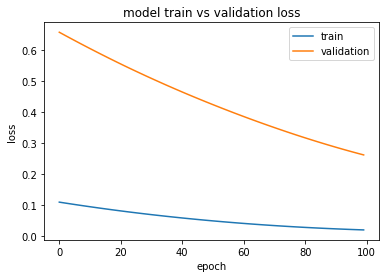

In [43]:
# plot train and validation loss
pyplot.plot(history_underfitting.history['loss'])
pyplot.plot(history_underfitting.history['val_loss'])
pyplot.title('model train vs validation loss')
pyplot.ylabel('loss')
pyplot.xlabel('epoch')
pyplot.legend(['train', 'validation'], loc='upper right')
pyplot.show()

### Underfitting (insufficient memory cells)

In [7]:
# set LSTM unit to 1 and optimizer to sgd
model_underfitting2 = Sequential()
model_underfitting2.add(LSTM(1, input_shape=(1,1)))
model_underfitting2.add(Dense(1, activation='linear'))

model_underfitting2.compile(loss='mse', optimizer='sgd', metrics=['accuracy'])

X, y = get_train()
val_X, val_y = get_validation()
history_underfitting2 = model_underfitting2.fit(X, y, epochs=300, validation_data=(val_X, val_y), shuffle=False)

Train on 5 samples, validate on 5 samples
Epoch 1/300
5/5 [==============================] - 1s 209ms/step - loss: 0.1362 - acc: 0.0000e+00 - val_loss: 0.7803 - val_acc: 0.0000e+00
Epoch 2/300
5/5 [==============================] - 0s 1ms/step - loss: 0.1315 - acc: 0.0000e+00 - val_loss: 0.7684 - val_acc: 0.0000e+00
Epoch 3/300
5/5 [==============================] - 0s 1ms/step - loss: 0.1270 - acc: 0.0000e+00 - val_loss: 0.7568 - val_acc: 0.0000e+00
Epoch 4/300
5/5 [==============================] - 0s 2ms/step - loss: 0.1227 - acc: 0.0000e+00 - val_loss: 0.7456 - val_acc: 0.0000e+00
Epoch 5/300
5/5 [==============================] - 0s 1ms/step - loss: 0.1186 - acc: 0.0000e+00 - val_loss: 0.7347 - val_acc: 0.0000e+00
Epoch 6/300
5/5 [==============================] - 0s 1ms/step - loss: 0.1146 - acc: 0.0000e+00 - val_loss: 0.7241 - val_acc: 0.0000e+00
Epoch 7/300
5/5 [==============================] - 0s 1ms/step - loss: 0.1108 - acc: 0.0000e+00 - val_loss: 0.7139 - val_acc: 0.0000e+

Epoch 61/300
5/5 [==============================] - 0s 1ms/step - loss: 0.0346 - acc: 0.0000e+00 - val_loss: 0.4300 - val_acc: 0.0000e+00
Epoch 62/300
5/5 [==============================] - 0s 1ms/step - loss: 0.0342 - acc: 0.0000e+00 - val_loss: 0.4276 - val_acc: 0.0000e+00
Epoch 63/300
5/5 [==============================] - 0s 1ms/step - loss: 0.0339 - acc: 0.0000e+00 - val_loss: 0.4253 - val_acc: 0.0000e+00
Epoch 64/300
5/5 [==============================] - 0s 1ms/step - loss: 0.0336 - acc: 0.0000e+00 - val_loss: 0.4231 - val_acc: 0.0000e+00
Epoch 65/300
5/5 [==============================] - 0s 1ms/step - loss: 0.0333 - acc: 0.0000e+00 - val_loss: 0.4209 - val_acc: 0.0000e+00
Epoch 66/300
5/5 [==============================] - 0s 1ms/step - loss: 0.0330 - acc: 0.0000e+00 - val_loss: 0.4187 - val_acc: 0.0000e+00
Epoch 67/300
5/5 [==============================] - 0s 1ms/step - loss: 0.0327 - acc: 0.0000e+00 - val_loss: 0.4166 - val_acc: 0.0000e+00
Epoch 68/300
5/5 [================

Epoch 121/300
5/5 [==============================] - 0s 1ms/step - loss: 0.0271 - acc: 0.0000e+00 - val_loss: 0.3533 - val_acc: 0.0000e+00
Epoch 122/300
5/5 [==============================] - 0s 1ms/step - loss: 0.0271 - acc: 0.0000e+00 - val_loss: 0.3527 - val_acc: 0.0000e+00
Epoch 123/300
5/5 [==============================] - 0s 954us/step - loss: 0.0271 - acc: 0.0000e+00 - val_loss: 0.3521 - val_acc: 0.0000e+00
Epoch 124/300
5/5 [==============================] - 0s 1ms/step - loss: 0.0270 - acc: 0.0000e+00 - val_loss: 0.3516 - val_acc: 0.0000e+00
Epoch 125/300
5/5 [==============================] - 0s 1ms/step - loss: 0.0270 - acc: 0.0000e+00 - val_loss: 0.3510 - val_acc: 0.0000e+00
Epoch 126/300
5/5 [==============================] - 0s 1ms/step - loss: 0.0270 - acc: 0.0000e+00 - val_loss: 0.3505 - val_acc: 0.0000e+00
Epoch 127/300
5/5 [==============================] - 0s 1ms/step - loss: 0.0270 - acc: 0.0000e+00 - val_loss: 0.3499 - val_acc: 0.0000e+00
Epoch 128/300
5/5 [======

Epoch 180/300
5/5 [==============================] - 0s 1ms/step - loss: 0.0265 - acc: 0.0000e+00 - val_loss: 0.3332 - val_acc: 0.0000e+00
Epoch 181/300
5/5 [==============================] - 0s 2ms/step - loss: 0.0264 - acc: 0.0000e+00 - val_loss: 0.3330 - val_acc: 0.0000e+00
Epoch 182/300
5/5 [==============================] - 0s 1ms/step - loss: 0.0264 - acc: 0.0000e+00 - val_loss: 0.3329 - val_acc: 0.0000e+00
Epoch 183/300
5/5 [==============================] - 0s 1ms/step - loss: 0.0264 - acc: 0.0000e+00 - val_loss: 0.3327 - val_acc: 0.0000e+00
Epoch 184/300
5/5 [==============================] - 0s 2ms/step - loss: 0.0264 - acc: 0.0000e+00 - val_loss: 0.3325 - val_acc: 0.0000e+00
Epoch 185/300
5/5 [==============================] - 0s 938us/step - loss: 0.0264 - acc: 0.0000e+00 - val_loss: 0.3324 - val_acc: 0.0000e+00
Epoch 186/300
5/5 [==============================] - 0s 1ms/step - loss: 0.0264 - acc: 0.0000e+00 - val_loss: 0.3322 - val_acc: 0.0000e+00
Epoch 187/300
5/5 [======

Epoch 239/300
5/5 [==============================] - 0s 989us/step - loss: 0.0263 - acc: 0.0000e+00 - val_loss: 0.3268 - val_acc: 0.0000e+00
Epoch 240/300
5/5 [==============================] - 0s 1ms/step - loss: 0.0263 - acc: 0.0000e+00 - val_loss: 0.3267 - val_acc: 0.0000e+00
Epoch 241/300
5/5 [==============================] - 0s 974us/step - loss: 0.0263 - acc: 0.0000e+00 - val_loss: 0.3267 - val_acc: 0.0000e+00
Epoch 242/300
5/5 [==============================] - 0s 1000us/step - loss: 0.0263 - acc: 0.0000e+00 - val_loss: 0.3266 - val_acc: 0.0000e+00
Epoch 243/300
5/5 [==============================] - 0s 1ms/step - loss: 0.0263 - acc: 0.0000e+00 - val_loss: 0.3266 - val_acc: 0.0000e+00
Epoch 244/300
5/5 [==============================] - 0s 908us/step - loss: 0.0263 - acc: 0.0000e+00 - val_loss: 0.3265 - val_acc: 0.0000e+00
Epoch 245/300
5/5 [==============================] - 0s 1ms/step - loss: 0.0263 - acc: 0.0000e+00 - val_loss: 0.3264 - val_acc: 0.0000e+00
Epoch 246/300
5/5 

Epoch 298/300
5/5 [==============================] - 0s 1ms/step - loss: 0.0261 - acc: 0.0000e+00 - val_loss: 0.3241 - val_acc: 0.0000e+00
Epoch 299/300
5/5 [==============================] - 0s 1ms/step - loss: 0.0261 - acc: 0.0000e+00 - val_loss: 0.3241 - val_acc: 0.0000e+00
Epoch 300/300
5/5 [==============================] - 0s 2ms/step - loss: 0.0261 - acc: 0.0000e+00 - val_loss: 0.3240 - val_acc: 0.0000e+00


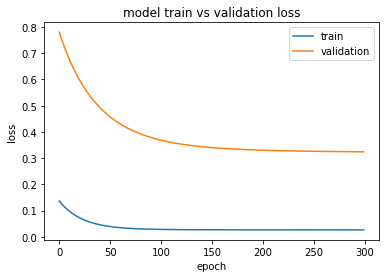

In [8]:
# plot train and validation loss
pyplot.plot(history_underfitting2.history['loss'])
pyplot.plot(history_underfitting2.history['val_loss'])
pyplot.title('model train vs validation loss')
pyplot.ylabel('loss')
pyplot.xlabel('epoch')
pyplot.legend(['train', 'validation'], loc='upper right')
pyplot.show()

### Overfitting

In [9]:
# set epochs to 1200
model_overfitting = Sequential()
model_overfitting.add(LSTM(10, input_shape=(1,1)))
model_overfitting.add(Dense(1, activation='linear'))

model_overfitting.compile(loss='mse', optimizer='adam', metrics=['accuracy'])

X, y = get_train()
val_X, val_y = get_validation()
history_overfitting = model_overfitting.fit(X, y, epochs=1200, validation_data=(val_X, val_y), shuffle=False)

Train on 5 samples, validate on 5 samples
Epoch 1/1200
5/5 [==============================] - 1s 237ms/step - loss: 0.0854 - acc: 0.0000e+00 - val_loss: 0.4787 - val_acc: 0.0000e+00
Epoch 2/1200
5/5 [==============================] - 0s 1ms/step - loss: 0.0842 - acc: 0.0000e+00 - val_loss: 0.4750 - val_acc: 0.0000e+00
Epoch 3/1200
5/5 [==============================] - 0s 1ms/step - loss: 0.0831 - acc: 0.0000e+00 - val_loss: 0.4707 - val_acc: 0.0000e+00
Epoch 4/1200
5/5 [==============================] - 0s 2ms/step - loss: 0.0819 - acc: 0.0000e+00 - val_loss: 0.4665 - val_acc: 0.0000e+00
Epoch 5/1200
5/5 [==============================] - 0s 2ms/step - loss: 0.0807 - acc: 0.0000e+00 - val_loss: 0.4622 - val_acc: 0.0000e+00
Epoch 6/1200
5/5 [==============================] - 0s 1ms/step - loss: 0.0795 - acc: 0.0000e+00 - val_loss: 0.4580 - val_acc: 0.0000e+00
Epoch 7/1200
5/5 [==============================] - 0s 2ms/step - loss: 0.0783 - acc: 0.0000e+00 - val_loss: 0.4538 - val_acc: 0

Epoch 60/1200
5/5 [==============================] - 0s 2ms/step - loss: 0.0283 - acc: 0.0000e+00 - val_loss: 0.2509 - val_acc: 0.0000e+00
Epoch 61/1200
5/5 [==============================] - 0s 1ms/step - loss: 0.0277 - acc: 0.0000e+00 - val_loss: 0.2476 - val_acc: 0.0000e+00
Epoch 62/1200
5/5 [==============================] - 0s 1ms/step - loss: 0.0270 - acc: 0.0000e+00 - val_loss: 0.2444 - val_acc: 0.0000e+00
Epoch 63/1200
5/5 [==============================] - 0s 2ms/step - loss: 0.0264 - acc: 0.0000e+00 - val_loss: 0.2413 - val_acc: 0.0000e+00
Epoch 64/1200
5/5 [==============================] - 0s 1ms/step - loss: 0.0258 - acc: 0.0000e+00 - val_loss: 0.2381 - val_acc: 0.0000e+00
Epoch 65/1200
5/5 [==============================] - 0s 2ms/step - loss: 0.0252 - acc: 0.0000e+00 - val_loss: 0.2350 - val_acc: 0.0000e+00
Epoch 66/1200
5/5 [==============================] - 0s 1ms/step - loss: 0.0246 - acc: 0.0000e+00 - val_loss: 0.2319 - val_acc: 0.0000e+00
Epoch 67/1200
5/5 [========

Epoch 120/1200
5/5 [==============================] - 0s 1ms/step - loss: 0.0082 - acc: 0.0000e+00 - val_loss: 0.1136 - val_acc: 0.2000
Epoch 121/1200
5/5 [==============================] - 0s 1ms/step - loss: 0.0081 - acc: 0.0000e+00 - val_loss: 0.1122 - val_acc: 0.2000
Epoch 122/1200
5/5 [==============================] - 0s 2ms/step - loss: 0.0080 - acc: 0.0000e+00 - val_loss: 0.1110 - val_acc: 0.2000
Epoch 123/1200
5/5 [==============================] - 0s 2ms/step - loss: 0.0079 - acc: 0.0000e+00 - val_loss: 0.1097 - val_acc: 0.2000
Epoch 124/1200
5/5 [==============================] - 0s 925us/step - loss: 0.0078 - acc: 0.0000e+00 - val_loss: 0.1084 - val_acc: 0.2000
Epoch 125/1200
5/5 [==============================] - 0s 2ms/step - loss: 0.0077 - acc: 0.0000e+00 - val_loss: 0.1072 - val_acc: 0.2000
Epoch 126/1200
5/5 [==============================] - 0s 2ms/step - loss: 0.0076 - acc: 0.0000e+00 - val_loss: 0.1060 - val_acc: 0.2000
Epoch 127/1200
5/5 [==========================

Epoch 181/1200
5/5 [==============================] - 0s 1ms/step - loss: 0.0058 - acc: 0.0000e+00 - val_loss: 0.0696 - val_acc: 0.2000
Epoch 182/1200
5/5 [==============================] - 0s 1ms/step - loss: 0.0058 - acc: 0.0000e+00 - val_loss: 0.0692 - val_acc: 0.2000
Epoch 183/1200
5/5 [==============================] - 0s 1ms/step - loss: 0.0058 - acc: 0.0000e+00 - val_loss: 0.0689 - val_acc: 0.2000
Epoch 184/1200
5/5 [==============================] - 0s 2ms/step - loss: 0.0057 - acc: 0.0000e+00 - val_loss: 0.0686 - val_acc: 0.2000
Epoch 185/1200
5/5 [==============================] - 0s 1ms/step - loss: 0.0057 - acc: 0.0000e+00 - val_loss: 0.0682 - val_acc: 0.2000
Epoch 186/1200
5/5 [==============================] - 0s 1ms/step - loss: 0.0057 - acc: 0.0000e+00 - val_loss: 0.0679 - val_acc: 0.2000
Epoch 187/1200
5/5 [==============================] - 0s 1ms/step - loss: 0.0057 - acc: 0.0000e+00 - val_loss: 0.0676 - val_acc: 0.2000
Epoch 188/1200
5/5 [============================

Epoch 242/1200
5/5 [==============================] - 0s 2ms/step - loss: 0.0047 - acc: 0.0000e+00 - val_loss: 0.0533 - val_acc: 0.2000
Epoch 243/1200
5/5 [==============================] - 0s 1ms/step - loss: 0.0047 - acc: 0.0000e+00 - val_loss: 0.0531 - val_acc: 0.2000
Epoch 244/1200
5/5 [==============================] - 0s 1ms/step - loss: 0.0047 - acc: 0.0000e+00 - val_loss: 0.0529 - val_acc: 0.2000
Epoch 245/1200
5/5 [==============================] - 0s 1ms/step - loss: 0.0047 - acc: 0.0000e+00 - val_loss: 0.0526 - val_acc: 0.2000
Epoch 246/1200
5/5 [==============================] - 0s 1ms/step - loss: 0.0046 - acc: 0.0000e+00 - val_loss: 0.0524 - val_acc: 0.2000
Epoch 247/1200
5/5 [==============================] - 0s 2ms/step - loss: 0.0046 - acc: 0.0000e+00 - val_loss: 0.0521 - val_acc: 0.2000
Epoch 248/1200
5/5 [==============================] - 0s 955us/step - loss: 0.0046 - acc: 0.0000e+00 - val_loss: 0.0519 - val_acc: 0.2000
Epoch 249/1200
5/5 [==========================

Epoch 303/1200
5/5 [==============================] - 0s 2ms/step - loss: 0.0036 - acc: 0.0000e+00 - val_loss: 0.0390 - val_acc: 0.2000
Epoch 304/1200
5/5 [==============================] - 0s 1ms/step - loss: 0.0036 - acc: 0.0000e+00 - val_loss: 0.0387 - val_acc: 0.2000
Epoch 305/1200
5/5 [==============================] - 0s 1ms/step - loss: 0.0036 - acc: 0.0000e+00 - val_loss: 0.0385 - val_acc: 0.2000
Epoch 306/1200
5/5 [==============================] - 0s 1ms/step - loss: 0.0036 - acc: 0.0000e+00 - val_loss: 0.0383 - val_acc: 0.2000
Epoch 307/1200
5/5 [==============================] - 0s 1ms/step - loss: 0.0036 - acc: 0.0000e+00 - val_loss: 0.0381 - val_acc: 0.2000
Epoch 308/1200
5/5 [==============================] - 0s 2ms/step - loss: 0.0035 - acc: 0.0000e+00 - val_loss: 0.0378 - val_acc: 0.2000
Epoch 309/1200
5/5 [==============================] - 0s 1ms/step - loss: 0.0035 - acc: 0.0000e+00 - val_loss: 0.0376 - val_acc: 0.2000
Epoch 310/1200
5/5 [============================

Epoch 364/1200
5/5 [==============================] - 0s 2ms/step - loss: 0.0026 - acc: 0.0000e+00 - val_loss: 0.0260 - val_acc: 0.2000
Epoch 365/1200
5/5 [==============================] - 0s 2ms/step - loss: 0.0026 - acc: 0.0000e+00 - val_loss: 0.0258 - val_acc: 0.2000
Epoch 366/1200
5/5 [==============================] - 0s 1ms/step - loss: 0.0026 - acc: 0.0000e+00 - val_loss: 0.0256 - val_acc: 0.2000
Epoch 367/1200
5/5 [==============================] - 0s 1ms/step - loss: 0.0026 - acc: 0.0000e+00 - val_loss: 0.0254 - val_acc: 0.2000
Epoch 368/1200
5/5 [==============================] - 0s 2ms/step - loss: 0.0026 - acc: 0.0000e+00 - val_loss: 0.0252 - val_acc: 0.2000
Epoch 369/1200
5/5 [==============================] - 0s 1ms/step - loss: 0.0026 - acc: 0.0000e+00 - val_loss: 0.0250 - val_acc: 0.2000
Epoch 370/1200
5/5 [==============================] - 0s 2ms/step - loss: 0.0025 - acc: 0.0000e+00 - val_loss: 0.0248 - val_acc: 0.2000
Epoch 371/1200
5/5 [============================

Epoch 425/1200
5/5 [==============================] - 0s 1ms/step - loss: 0.0018 - acc: 0.0000e+00 - val_loss: 0.0154 - val_acc: 0.2000
Epoch 426/1200
5/5 [==============================] - 0s 1ms/step - loss: 0.0018 - acc: 0.0000e+00 - val_loss: 0.0152 - val_acc: 0.2000
Epoch 427/1200
5/5 [==============================] - 0s 1ms/step - loss: 0.0017 - acc: 0.0000e+00 - val_loss: 0.0151 - val_acc: 0.2000
Epoch 428/1200
5/5 [==============================] - 0s 1ms/step - loss: 0.0017 - acc: 0.0000e+00 - val_loss: 0.0149 - val_acc: 0.2000
Epoch 429/1200
5/5 [==============================] - 0s 1ms/step - loss: 0.0017 - acc: 0.0000e+00 - val_loss: 0.0148 - val_acc: 0.2000
Epoch 430/1200
5/5 [==============================] - 0s 1ms/step - loss: 0.0017 - acc: 0.0000e+00 - val_loss: 0.0147 - val_acc: 0.2000
Epoch 431/1200
5/5 [==============================] - 0s 1ms/step - loss: 0.0017 - acc: 0.0000e+00 - val_loss: 0.0145 - val_acc: 0.2000
Epoch 432/1200
5/5 [============================

Epoch 486/1200
5/5 [==============================] - 0s 1ms/step - loss: 0.0011 - acc: 0.0000e+00 - val_loss: 0.0077 - val_acc: 0.2000
Epoch 487/1200
5/5 [==============================] - 0s 2ms/step - loss: 0.0011 - acc: 0.0000e+00 - val_loss: 0.0076 - val_acc: 0.2000
Epoch 488/1200
5/5 [==============================] - 0s 1ms/step - loss: 0.0011 - acc: 0.0000e+00 - val_loss: 0.0075 - val_acc: 0.2000
Epoch 489/1200
5/5 [==============================] - 0s 1ms/step - loss: 0.0011 - acc: 0.0000e+00 - val_loss: 0.0074 - val_acc: 0.2000
Epoch 490/1200
5/5 [==============================] - 0s 1ms/step - loss: 0.0011 - acc: 0.0000e+00 - val_loss: 0.0073 - val_acc: 0.2000
Epoch 491/1200
5/5 [==============================] - 0s 1ms/step - loss: 0.0010 - acc: 0.0000e+00 - val_loss: 0.0072 - val_acc: 0.2000
Epoch 492/1200
5/5 [==============================] - 0s 1ms/step - loss: 0.0010 - acc: 0.0000e+00 - val_loss: 0.0071 - val_acc: 0.2000
Epoch 493/1200
5/5 [============================

Epoch 545/1200
5/5 [==============================] - 0s 1ms/step - loss: 6.2171e-04 - acc: 0.0000e+00 - val_loss: 0.0031 - val_acc: 0.2000
Epoch 546/1200
5/5 [==============================] - 0s 1ms/step - loss: 6.1536e-04 - acc: 0.0000e+00 - val_loss: 0.0030 - val_acc: 0.2000
Epoch 547/1200
5/5 [==============================] - 0s 1ms/step - loss: 6.0906e-04 - acc: 0.0000e+00 - val_loss: 0.0030 - val_acc: 0.2000
Epoch 548/1200
5/5 [==============================] - 0s 2ms/step - loss: 6.0280e-04 - acc: 0.0000e+00 - val_loss: 0.0029 - val_acc: 0.2000
Epoch 549/1200
5/5 [==============================] - 0s 1ms/step - loss: 5.9660e-04 - acc: 0.0000e+00 - val_loss: 0.0029 - val_acc: 0.2000
Epoch 550/1200
5/5 [==============================] - 0s 2ms/step - loss: 5.9044e-04 - acc: 0.0000e+00 - val_loss: 0.0028 - val_acc: 0.2000
Epoch 551/1200
5/5 [==============================] - 0s 1ms/step - loss: 5.8433e-04 - acc: 0.0000e+00 - val_loss: 0.0028 - val_acc: 0.2000
Epoch 552/1200
5/5 [

Epoch 604/1200
5/5 [==============================] - 0s 2ms/step - loss: 3.2481e-04 - acc: 0.0000e+00 - val_loss: 7.8904e-04 - val_acc: 0.2000
Epoch 605/1200
5/5 [==============================] - 0s 1ms/step - loss: 3.2103e-04 - acc: 0.0000e+00 - val_loss: 7.6580e-04 - val_acc: 0.2000
Epoch 606/1200
5/5 [==============================] - 0s 1ms/step - loss: 3.1728e-04 - acc: 0.0000e+00 - val_loss: 7.4299e-04 - val_acc: 0.2000
Epoch 607/1200
5/5 [==============================] - 0s 1ms/step - loss: 3.1356e-04 - acc: 0.0000e+00 - val_loss: 7.2062e-04 - val_acc: 0.2000
Epoch 608/1200
5/5 [==============================] - 0s 2ms/step - loss: 3.0988e-04 - acc: 0.0000e+00 - val_loss: 6.9870e-04 - val_acc: 0.2000
Epoch 609/1200
5/5 [==============================] - 0s 2ms/step - loss: 3.0624e-04 - acc: 0.0000e+00 - val_loss: 6.7723e-04 - val_acc: 0.2000
Epoch 610/1200
5/5 [==============================] - 0s 2ms/step - loss: 3.0263e-04 - acc: 0.0000e+00 - val_loss: 6.5619e-04 - val_acc:

Epoch 661/1200
5/5 [==============================] - 0s 1ms/step - loss: 1.6127e-04 - acc: 0.0000e+00 - val_loss: 6.8681e-05 - val_acc: 0.2000
Epoch 662/1200
5/5 [==============================] - 0s 1ms/step - loss: 1.5922e-04 - acc: 0.0000e+00 - val_loss: 6.4984e-05 - val_acc: 0.2000
Epoch 663/1200
5/5 [==============================] - 0s 1ms/step - loss: 1.5720e-04 - acc: 0.0000e+00 - val_loss: 6.1525e-05 - val_acc: 0.2000
Epoch 664/1200
5/5 [==============================] - 0s 1ms/step - loss: 1.5521e-04 - acc: 0.0000e+00 - val_loss: 5.8300e-05 - val_acc: 0.2000
Epoch 665/1200
5/5 [==============================] - 0s 1ms/step - loss: 1.5324e-04 - acc: 0.0000e+00 - val_loss: 5.5308e-05 - val_acc: 0.2000
Epoch 666/1200
5/5 [==============================] - 0s 1ms/step - loss: 1.5129e-04 - acc: 0.0000e+00 - val_loss: 5.2545e-05 - val_acc: 0.2000
Epoch 667/1200
5/5 [==============================] - 0s 2ms/step - loss: 1.4936e-04 - acc: 0.0000e+00 - val_loss: 5.0007e-05 - val_acc:

Epoch 718/1200
5/5 [==============================] - 0s 1ms/step - loss: 7.7356e-05 - acc: 0.0000e+00 - val_loss: 1.5053e-04 - val_acc: 0.2000
Epoch 719/1200
5/5 [==============================] - 0s 1ms/step - loss: 7.6373e-05 - acc: 0.0000e+00 - val_loss: 1.5579e-04 - val_acc: 0.2000
Epoch 720/1200
5/5 [==============================] - 0s 1ms/step - loss: 7.5403e-05 - acc: 0.0000e+00 - val_loss: 1.6113e-04 - val_acc: 0.2000
Epoch 721/1200
5/5 [==============================] - 0s 1ms/step - loss: 7.4446e-05 - acc: 0.0000e+00 - val_loss: 1.6655e-04 - val_acc: 0.2000
Epoch 722/1200
5/5 [==============================] - 0s 1ms/step - loss: 7.3503e-05 - acc: 0.0000e+00 - val_loss: 1.7206e-04 - val_acc: 0.2000
Epoch 723/1200
5/5 [==============================] - 0s 1ms/step - loss: 7.2572e-05 - acc: 0.0000e+00 - val_loss: 1.7765e-04 - val_acc: 0.2000
Epoch 724/1200
5/5 [==============================] - 0s 1ms/step - loss: 7.1654e-05 - acc: 0.0000e+00 - val_loss: 1.8331e-04 - val_acc:

Epoch 775/1200
5/5 [==============================] - 0s 923us/step - loss: 3.8793e-05 - acc: 0.0000e+00 - val_loss: 5.3377e-04 - val_acc: 0.2000
Epoch 776/1200
5/5 [==============================] - 0s 1ms/step - loss: 3.8368e-05 - acc: 0.0000e+00 - val_loss: 5.4119e-04 - val_acc: 0.2000
Epoch 777/1200
5/5 [==============================] - 0s 1ms/step - loss: 3.7949e-05 - acc: 0.0000e+00 - val_loss: 5.4862e-04 - val_acc: 0.2000
Epoch 778/1200
5/5 [==============================] - 0s 1ms/step - loss: 3.7536e-05 - acc: 0.0000e+00 - val_loss: 5.5605e-04 - val_acc: 0.2000
Epoch 779/1200
5/5 [==============================] - 0s 2ms/step - loss: 3.7130e-05 - acc: 0.0000e+00 - val_loss: 5.6347e-04 - val_acc: 0.2000
Epoch 780/1200
5/5 [==============================] - 0s 1ms/step - loss: 3.6731e-05 - acc: 0.0000e+00 - val_loss: 5.7090e-04 - val_acc: 0.2000
Epoch 781/1200
5/5 [==============================] - 0s 1ms/step - loss: 3.6337e-05 - acc: 0.0000e+00 - val_loss: 5.7832e-04 - val_ac

Epoch 832/1200
5/5 [==============================] - 0s 1ms/step - loss: 2.2785e-05 - acc: 0.0000e+00 - val_loss: 9.3657e-04 - val_acc: 0.2000
Epoch 833/1200
5/5 [==============================] - 0s 1ms/step - loss: 2.2618e-05 - acc: 0.0000e+00 - val_loss: 9.4296e-04 - val_acc: 0.2000
Epoch 834/1200
5/5 [==============================] - 0s 2ms/step - loss: 2.2453e-05 - acc: 0.0000e+00 - val_loss: 9.4932e-04 - val_acc: 0.2000
Epoch 835/1200
5/5 [==============================] - 0s 1ms/step - loss: 2.2292e-05 - acc: 0.0000e+00 - val_loss: 9.5565e-04 - val_acc: 0.2000
Epoch 836/1200
5/5 [==============================] - 0s 1ms/step - loss: 2.2133e-05 - acc: 0.0000e+00 - val_loss: 9.6195e-04 - val_acc: 0.2000
Epoch 837/1200
5/5 [==============================] - 0s 1ms/step - loss: 2.1977e-05 - acc: 0.0000e+00 - val_loss: 9.6822e-04 - val_acc: 0.2000
Epoch 838/1200
5/5 [==============================] - 0s 1ms/step - loss: 2.1823e-05 - acc: 0.0000e+00 - val_loss: 9.7445e-04 - val_acc:

Epoch 891/1200
5/5 [==============================] - 0s 1ms/step - loss: 1.6582e-05 - acc: 0.0000e+00 - val_loss: 0.0013 - val_acc: 0.2000
Epoch 892/1200
5/5 [==============================] - 0s 1ms/step - loss: 1.6523e-05 - acc: 0.0000e+00 - val_loss: 0.0013 - val_acc: 0.2000
Epoch 893/1200
5/5 [==============================] - 0s 1ms/step - loss: 1.6466e-05 - acc: 0.0000e+00 - val_loss: 0.0013 - val_acc: 0.2000
Epoch 894/1200
5/5 [==============================] - 0s 1ms/step - loss: 1.6409e-05 - acc: 0.0000e+00 - val_loss: 0.0013 - val_acc: 0.2000
Epoch 895/1200
5/5 [==============================] - 0s 2ms/step - loss: 1.6354e-05 - acc: 0.0000e+00 - val_loss: 0.0013 - val_acc: 0.2000
Epoch 896/1200
5/5 [==============================] - 0s 1ms/step - loss: 1.6299e-05 - acc: 0.0000e+00 - val_loss: 0.0013 - val_acc: 0.2000
Epoch 897/1200
5/5 [==============================] - 0s 2ms/step - loss: 1.6246e-05 - acc: 0.0000e+00 - val_loss: 0.0013 - val_acc: 0.2000
Epoch 898/1200
5/5 [

Epoch 950/1200
5/5 [==============================] - 0s 1ms/step - loss: 1.4455e-05 - acc: 0.0000e+00 - val_loss: 0.0015 - val_acc: 0.2000
Epoch 951/1200
5/5 [==============================] - 0s 1ms/step - loss: 1.4435e-05 - acc: 0.0000e+00 - val_loss: 0.0015 - val_acc: 0.2000
Epoch 952/1200
5/5 [==============================] - 0s 1ms/step - loss: 1.4416e-05 - acc: 0.0000e+00 - val_loss: 0.0015 - val_acc: 0.2000
Epoch 953/1200
5/5 [==============================] - 0s 1ms/step - loss: 1.4397e-05 - acc: 0.0000e+00 - val_loss: 0.0015 - val_acc: 0.2000
Epoch 954/1200
5/5 [==============================] - 0s 1ms/step - loss: 1.4378e-05 - acc: 0.0000e+00 - val_loss: 0.0015 - val_acc: 0.2000
Epoch 955/1200
5/5 [==============================] - 0s 1ms/step - loss: 1.4360e-05 - acc: 0.0000e+00 - val_loss: 0.0015 - val_acc: 0.2000
Epoch 956/1200
5/5 [==============================] - 0s 2ms/step - loss: 1.4342e-05 - acc: 0.0000e+00 - val_loss: 0.0015 - val_acc: 0.2000
Epoch 957/1200
5/5 [

Epoch 1009/1200
5/5 [==============================] - 0s 1ms/step - loss: 1.3731e-05 - acc: 0.0000e+00 - val_loss: 0.0016 - val_acc: 0.2000
Epoch 1010/1200
5/5 [==============================] - 0s 1ms/step - loss: 1.3724e-05 - acc: 0.0000e+00 - val_loss: 0.0016 - val_acc: 0.2000
Epoch 1011/1200
5/5 [==============================] - 0s 1ms/step - loss: 1.3717e-05 - acc: 0.0000e+00 - val_loss: 0.0016 - val_acc: 0.2000
Epoch 1012/1200
5/5 [==============================] - 0s 1ms/step - loss: 1.3710e-05 - acc: 0.0000e+00 - val_loss: 0.0016 - val_acc: 0.2000
Epoch 1013/1200
5/5 [==============================] - 0s 1ms/step - loss: 1.3703e-05 - acc: 0.0000e+00 - val_loss: 0.0016 - val_acc: 0.2000
Epoch 1014/1200
5/5 [==============================] - 0s 2ms/step - loss: 1.3697e-05 - acc: 0.0000e+00 - val_loss: 0.0016 - val_acc: 0.2000
Epoch 1015/1200
5/5 [==============================] - 0s 1ms/step - loss: 1.3690e-05 - acc: 0.0000e+00 - val_loss: 0.0016 - val_acc: 0.2000
Epoch 1016/12

5/5 [==============================] - 0s 1ms/step - loss: 1.3287e-05 - acc: 0.0000e+00 - val_loss: 0.0016 - val_acc: 0.2000
Epoch 1126/1200
5/5 [==============================] - 0s 1ms/step - loss: 1.3284e-05 - acc: 0.0000e+00 - val_loss: 0.0016 - val_acc: 0.2000
Epoch 1127/1200
5/5 [==============================] - 0s 2ms/step - loss: 1.3282e-05 - acc: 0.0000e+00 - val_loss: 0.0016 - val_acc: 0.2000
Epoch 1128/1200
5/5 [==============================] - 0s 2ms/step - loss: 1.3279e-05 - acc: 0.0000e+00 - val_loss: 0.0016 - val_acc: 0.2000
Epoch 1129/1200
5/5 [==============================] - 0s 1ms/step - loss: 1.3277e-05 - acc: 0.0000e+00 - val_loss: 0.0016 - val_acc: 0.2000
Epoch 1130/1200
5/5 [==============================] - 0s 952us/step - loss: 1.3275e-05 - acc: 0.0000e+00 - val_loss: 0.0016 - val_acc: 0.2000
Epoch 1131/1200
5/5 [==============================] - 0s 1ms/step - loss: 1.3272e-05 - acc: 0.0000e+00 - val_loss: 0.0016 - val_acc: 0.2000
Epoch 1132/1200
5/5 [======

Epoch 1184/1200
5/5 [==============================] - 0s 2ms/step - loss: 1.3153e-05 - acc: 0.0000e+00 - val_loss: 0.0016 - val_acc: 0.2000
Epoch 1185/1200
5/5 [==============================] - 0s 1ms/step - loss: 1.3151e-05 - acc: 0.0000e+00 - val_loss: 0.0016 - val_acc: 0.2000
Epoch 1186/1200
5/5 [==============================] - 0s 921us/step - loss: 1.3148e-05 - acc: 0.0000e+00 - val_loss: 0.0016 - val_acc: 0.2000
Epoch 1187/1200
5/5 [==============================] - 0s 1ms/step - loss: 1.3146e-05 - acc: 0.0000e+00 - val_loss: 0.0016 - val_acc: 0.2000
Epoch 1188/1200
5/5 [==============================] - 0s 2ms/step - loss: 1.3144e-05 - acc: 0.0000e+00 - val_loss: 0.0016 - val_acc: 0.2000
Epoch 1189/1200
5/5 [==============================] - 0s 1ms/step - loss: 1.3142e-05 - acc: 0.0000e+00 - val_loss: 0.0016 - val_acc: 0.2000
Epoch 1190/1200
5/5 [==============================] - 0s 2ms/step - loss: 1.3140e-05 - acc: 0.0000e+00 - val_loss: 0.0016 - val_acc: 0.2000
Epoch 1191/

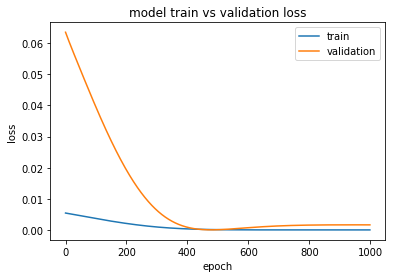

In [14]:
pyplot.plot(history_overfitting.history['loss'][200:])
pyplot.plot(history_overfitting.history['val_loss'][200:])
pyplot.title('model train vs validation loss')
pyplot.ylabel('loss')
pyplot.xlabel('epoch')
pyplot.legend(['train', 'validation'], loc='upper right')
pyplot.show()

### Champion model

In [16]:
# set epochs to 600
model_fitting = Sequential()
model_fitting.add(LSTM(10, input_shape=(1,1)))
model_fitting.add(Dense(1, activation='linear'))

model_fitting.compile(loss='mse', optimizer='adam', metrics=['accuracy'])

X, y = get_train()
val_X, val_y = get_validation()
history_fitting = model_fitting.fit(X, y, epochs=650, validation_data=(val_X, val_y), shuffle=False)

Train on 5 samples, validate on 5 samples
Epoch 1/650
5/5 [==============================] - 2s 337ms/step - loss: 0.1045 - acc: 0.0000e+00 - val_loss: 0.6179 - val_acc: 0.0000e+00
Epoch 2/650
5/5 [==============================] - 0s 1ms/step - loss: 0.1033 - acc: 0.0000e+00 - val_loss: 0.6139 - val_acc: 0.0000e+00
Epoch 3/650
5/5 [==============================] - 0s 1ms/step - loss: 0.1021 - acc: 0.0000e+00 - val_loss: 0.6102 - val_acc: 0.0000e+00
Epoch 4/650
5/5 [==============================] - 0s 1ms/step - loss: 0.1010 - acc: 0.0000e+00 - val_loss: 0.6063 - val_acc: 0.0000e+00
Epoch 5/650
5/5 [==============================] - 0s 1ms/step - loss: 0.0998 - acc: 0.0000e+00 - val_loss: 0.6023 - val_acc: 0.0000e+00
Epoch 6/650
5/5 [==============================] - 0s 2ms/step - loss: 0.0986 - acc: 0.0000e+00 - val_loss: 0.5983 - val_acc: 0.0000e+00
Epoch 7/650
5/5 [==============================] - 0s 2ms/step - loss: 0.0974 - acc: 0.0000e+00 - val_loss: 0.5945 - val_acc: 0.0000e+

Epoch 61/650
5/5 [==============================] - 0s 1ms/step - loss: 0.0456 - acc: 0.0000e+00 - val_loss: 0.3979 - val_acc: 0.0000e+00
Epoch 62/650
5/5 [==============================] - 0s 1ms/step - loss: 0.0449 - acc: 0.0000e+00 - val_loss: 0.3945 - val_acc: 0.0000e+00
Epoch 63/650
5/5 [==============================] - 0s 1ms/step - loss: 0.0441 - acc: 0.0000e+00 - val_loss: 0.3912 - val_acc: 0.0000e+00
Epoch 64/650
5/5 [==============================] - 0s 2ms/step - loss: 0.0434 - acc: 0.0000e+00 - val_loss: 0.3878 - val_acc: 0.0000e+00
Epoch 65/650
5/5 [==============================] - 0s 1ms/step - loss: 0.0427 - acc: 0.0000e+00 - val_loss: 0.3844 - val_acc: 0.0000e+00
Epoch 66/650
5/5 [==============================] - 0s 1ms/step - loss: 0.0420 - acc: 0.0000e+00 - val_loss: 0.3810 - val_acc: 0.0000e+00
Epoch 67/650
5/5 [==============================] - 0s 1ms/step - loss: 0.0413 - acc: 0.0000e+00 - val_loss: 0.3777 - val_acc: 0.0000e+00
Epoch 68/650
5/5 [================

Epoch 121/650
5/5 [==============================] - 0s 1ms/step - loss: 0.0163 - acc: 0.0000e+00 - val_loss: 0.2247 - val_acc: 0.0000e+00
Epoch 122/650
5/5 [==============================] - 0s 2ms/step - loss: 0.0161 - acc: 0.0000e+00 - val_loss: 0.2225 - val_acc: 0.0000e+00
Epoch 123/650
5/5 [==============================] - 0s 1ms/step - loss: 0.0159 - acc: 0.0000e+00 - val_loss: 0.2204 - val_acc: 0.0000e+00
Epoch 124/650
5/5 [==============================] - 0s 1ms/step - loss: 0.0157 - acc: 0.0000e+00 - val_loss: 0.2182 - val_acc: 0.0000e+00
Epoch 125/650
5/5 [==============================] - 0s 1ms/step - loss: 0.0155 - acc: 0.0000e+00 - val_loss: 0.2162 - val_acc: 0.0000e+00
Epoch 126/650
5/5 [==============================] - 0s 1ms/step - loss: 0.0153 - acc: 0.0000e+00 - val_loss: 0.2141 - val_acc: 0.0000e+00
Epoch 127/650
5/5 [==============================] - 0s 2ms/step - loss: 0.0151 - acc: 0.0000e+00 - val_loss: 0.2121 - val_acc: 0.0000e+00
Epoch 128/650
5/5 [========

Epoch 180/650
5/5 [==============================] - 0s 1ms/step - loss: 0.0106 - acc: 0.0000e+00 - val_loss: 0.1421 - val_acc: 0.0000e+00
Epoch 181/650
5/5 [==============================] - 0s 2ms/step - loss: 0.0105 - acc: 0.0000e+00 - val_loss: 0.1414 - val_acc: 0.0000e+00
Epoch 182/650
5/5 [==============================] - 0s 1ms/step - loss: 0.0105 - acc: 0.0000e+00 - val_loss: 0.1407 - val_acc: 0.0000e+00
Epoch 183/650
5/5 [==============================] - 0s 2ms/step - loss: 0.0105 - acc: 0.0000e+00 - val_loss: 0.1400 - val_acc: 0.0000e+00
Epoch 184/650
5/5 [==============================] - 0s 1ms/step - loss: 0.0105 - acc: 0.0000e+00 - val_loss: 0.1393 - val_acc: 0.0000e+00
Epoch 185/650
5/5 [==============================] - 0s 2ms/step - loss: 0.0104 - acc: 0.0000e+00 - val_loss: 0.1386 - val_acc: 0.0000e+00
Epoch 186/650
5/5 [==============================] - 0s 1ms/step - loss: 0.0104 - acc: 0.0000e+00 - val_loss: 0.1379 - val_acc: 0.0000e+00
Epoch 187/650
5/5 [========

Epoch 241/650
5/5 [==============================] - 0s 2ms/step - loss: 0.0090 - acc: 0.0000e+00 - val_loss: 0.1128 - val_acc: 0.2000
Epoch 242/650
5/5 [==============================] - 0s 1ms/step - loss: 0.0090 - acc: 0.0000e+00 - val_loss: 0.1124 - val_acc: 0.2000
Epoch 243/650
5/5 [==============================] - 0s 1ms/step - loss: 0.0090 - acc: 0.0000e+00 - val_loss: 0.1120 - val_acc: 0.2000
Epoch 244/650
5/5 [==============================] - 0s 2ms/step - loss: 0.0089 - acc: 0.0000e+00 - val_loss: 0.1117 - val_acc: 0.2000
Epoch 245/650
5/5 [==============================] - 0s 1ms/step - loss: 0.0089 - acc: 0.0000e+00 - val_loss: 0.1113 - val_acc: 0.2000
Epoch 246/650
5/5 [==============================] - 0s 1ms/step - loss: 0.0089 - acc: 0.0000e+00 - val_loss: 0.1109 - val_acc: 0.2000
Epoch 247/650
5/5 [==============================] - 0s 1ms/step - loss: 0.0089 - acc: 0.0000e+00 - val_loss: 0.1106 - val_acc: 0.2000
Epoch 248/650
5/5 [==============================] - 0s

Epoch 302/650
5/5 [==============================] - 0s 1ms/step - loss: 0.0074 - acc: 0.0000e+00 - val_loss: 0.0907 - val_acc: 0.2000
Epoch 303/650
5/5 [==============================] - 0s 1ms/step - loss: 0.0074 - acc: 0.0000e+00 - val_loss: 0.0903 - val_acc: 0.2000
Epoch 304/650
5/5 [==============================] - 0s 1ms/step - loss: 0.0074 - acc: 0.0000e+00 - val_loss: 0.0899 - val_acc: 0.2000
Epoch 305/650
5/5 [==============================] - 0s 1ms/step - loss: 0.0074 - acc: 0.0000e+00 - val_loss: 0.0896 - val_acc: 0.2000
Epoch 306/650
5/5 [==============================] - 0s 1ms/step - loss: 0.0073 - acc: 0.0000e+00 - val_loss: 0.0892 - val_acc: 0.2000
Epoch 307/650
5/5 [==============================] - 0s 1ms/step - loss: 0.0073 - acc: 0.0000e+00 - val_loss: 0.0888 - val_acc: 0.2000
Epoch 308/650
5/5 [==============================] - 0s 1ms/step - loss: 0.0073 - acc: 0.0000e+00 - val_loss: 0.0885 - val_acc: 0.2000
Epoch 309/650
5/5 [==============================] - 0s

Epoch 363/650
5/5 [==============================] - 0s 1ms/step - loss: 0.0058 - acc: 0.0000e+00 - val_loss: 0.0684 - val_acc: 0.2000
Epoch 364/650
5/5 [==============================] - 0s 2ms/step - loss: 0.0058 - acc: 0.0000e+00 - val_loss: 0.0680 - val_acc: 0.2000
Epoch 365/650
5/5 [==============================] - 0s 1ms/step - loss: 0.0058 - acc: 0.0000e+00 - val_loss: 0.0676 - val_acc: 0.2000
Epoch 366/650
5/5 [==============================] - 0s 1ms/step - loss: 0.0057 - acc: 0.0000e+00 - val_loss: 0.0673 - val_acc: 0.2000
Epoch 367/650
5/5 [==============================] - 0s 1ms/step - loss: 0.0057 - acc: 0.0000e+00 - val_loss: 0.0669 - val_acc: 0.2000
Epoch 368/650
5/5 [==============================] - 0s 1ms/step - loss: 0.0057 - acc: 0.0000e+00 - val_loss: 0.0666 - val_acc: 0.2000
Epoch 369/650
5/5 [==============================] - 0s 944us/step - loss: 0.0057 - acc: 0.0000e+00 - val_loss: 0.0662 - val_acc: 0.2000
Epoch 370/650
5/5 [==============================] - 

Epoch 424/650
5/5 [==============================] - 0s 1ms/step - loss: 0.0042 - acc: 0.0000e+00 - val_loss: 0.0471 - val_acc: 0.2000
Epoch 425/650
5/5 [==============================] - 0s 1ms/step - loss: 0.0042 - acc: 0.0000e+00 - val_loss: 0.0467 - val_acc: 0.2000
Epoch 426/650
5/5 [==============================] - 0s 1ms/step - loss: 0.0042 - acc: 0.0000e+00 - val_loss: 0.0464 - val_acc: 0.2000
Epoch 427/650
5/5 [==============================] - 0s 1ms/step - loss: 0.0042 - acc: 0.0000e+00 - val_loss: 0.0461 - val_acc: 0.2000
Epoch 428/650
5/5 [==============================] - 0s 1ms/step - loss: 0.0041 - acc: 0.0000e+00 - val_loss: 0.0457 - val_acc: 0.2000
Epoch 429/650
5/5 [==============================] - 0s 1ms/step - loss: 0.0041 - acc: 0.0000e+00 - val_loss: 0.0454 - val_acc: 0.2000
Epoch 430/650
5/5 [==============================] - 0s 2ms/step - loss: 0.0041 - acc: 0.0000e+00 - val_loss: 0.0451 - val_acc: 0.2000
Epoch 431/650
5/5 [==============================] - 0s

Epoch 485/650
5/5 [==============================] - 0s 1ms/step - loss: 0.0028 - acc: 0.0000e+00 - val_loss: 0.0284 - val_acc: 0.2000
Epoch 486/650
5/5 [==============================] - 0s 2ms/step - loss: 0.0028 - acc: 0.0000e+00 - val_loss: 0.0281 - val_acc: 0.2000
Epoch 487/650
5/5 [==============================] - 0s 1ms/step - loss: 0.0027 - acc: 0.0000e+00 - val_loss: 0.0278 - val_acc: 0.2000
Epoch 488/650
5/5 [==============================] - 0s 1ms/step - loss: 0.0027 - acc: 0.0000e+00 - val_loss: 0.0275 - val_acc: 0.2000
Epoch 489/650
5/5 [==============================] - 0s 1ms/step - loss: 0.0027 - acc: 0.0000e+00 - val_loss: 0.0273 - val_acc: 0.2000
Epoch 490/650
5/5 [==============================] - 0s 2ms/step - loss: 0.0027 - acc: 0.0000e+00 - val_loss: 0.0270 - val_acc: 0.2000
Epoch 491/650
5/5 [==============================] - 0s 1ms/step - loss: 0.0026 - acc: 0.0000e+00 - val_loss: 0.0267 - val_acc: 0.2000
Epoch 492/650
5/5 [==============================] - 0s

Epoch 546/650
5/5 [==============================] - 0s 1ms/step - loss: 0.0016 - acc: 0.0000e+00 - val_loss: 0.0140 - val_acc: 0.2000
Epoch 547/650
5/5 [==============================] - 0s 1ms/step - loss: 0.0016 - acc: 0.0000e+00 - val_loss: 0.0138 - val_acc: 0.2000
Epoch 548/650
5/5 [==============================] - 0s 1ms/step - loss: 0.0016 - acc: 0.0000e+00 - val_loss: 0.0136 - val_acc: 0.2000
Epoch 549/650
5/5 [==============================] - 0s 1ms/step - loss: 0.0015 - acc: 0.0000e+00 - val_loss: 0.0134 - val_acc: 0.2000
Epoch 550/650
5/5 [==============================] - 0s 1ms/step - loss: 0.0015 - acc: 0.0000e+00 - val_loss: 0.0132 - val_acc: 0.2000
Epoch 551/650
5/5 [==============================] - 0s 1ms/step - loss: 0.0015 - acc: 0.0000e+00 - val_loss: 0.0130 - val_acc: 0.2000
Epoch 552/650
5/5 [==============================] - 0s 1ms/step - loss: 0.0015 - acc: 0.0000e+00 - val_loss: 0.0129 - val_acc: 0.2000
Epoch 553/650
5/5 [==============================] - 0s

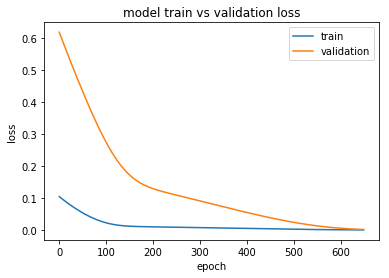

In [17]:
pyplot.plot(history_fitting.history['loss'])
pyplot.plot(history_fitting.history['val_loss'])
pyplot.title('model train vs validation loss')
pyplot.ylabel('loss')
pyplot.xlabel('epoch')
pyplot.legend(['train', 'validation'], loc='upper right')
pyplot.show()

### Robust Champion Model

In [18]:
train = DataFrame()
validation = DataFrame()

In [19]:
for i in range(5):
    model_robust = Sequential()
    model_robust.add(LSTM(10, input_shape=(1,1)))
    model_robust.add(Dense(1, activation='linear'))
    
    model_robust.compile(loss='mse', optimizer='adam', metrics=['accuracy'])
    
    X, y = get_train()
    val_X, val_y = get_validation()
    
    history_robust = model_robust.fit(X, y, epochs=300, validation_data=(val_X, val_y), shuffle=False)
    
    train[str(i)] = history_robust.history['loss']
    validation[str(i)] = history_robust.history['val_loss']

Train on 5 samples, validate on 5 samples
Epoch 1/300
5/5 [==============================] - 2s 467ms/step - loss: 0.1045 - acc: 0.0000e+00 - val_loss: 0.6115 - val_acc: 0.0000e+00
Epoch 2/300
5/5 [==============================] - 0s 1ms/step - loss: 0.1029 - acc: 0.0000e+00 - val_loss: 0.6060 - val_acc: 0.0000e+00
Epoch 3/300
5/5 [==============================] - 0s 1ms/step - loss: 0.1014 - acc: 0.0000e+00 - val_loss: 0.6005 - val_acc: 0.0000e+00
Epoch 4/300
5/5 [==============================] - 0s 3ms/step - loss: 0.0998 - acc: 0.0000e+00 - val_loss: 0.5951 - val_acc: 0.0000e+00
Epoch 5/300
5/5 [==============================] - 0s 2ms/step - loss: 0.0983 - acc: 0.0000e+00 - val_loss: 0.5896 - val_acc: 0.0000e+00
Epoch 6/300
5/5 [==============================] - 0s 2ms/step - loss: 0.0968 - acc: 0.0000e+00 - val_loss: 0.5842 - val_acc: 0.0000e+00
Epoch 7/300
5/5 [==============================] - 0s 2ms/step - loss: 0.0954 - acc: 0.0000e+00 - val_loss: 0.5789 - val_acc: 0.0000e+

5/5 [==============================] - 0s 1ms/step - loss: 0.0371 - acc: 0.0000e+00 - val_loss: 0.3391 - val_acc: 0.0000e+00
Epoch 61/300
5/5 [==============================] - 0s 1ms/step - loss: 0.0364 - acc: 0.0000e+00 - val_loss: 0.3355 - val_acc: 0.0000e+00
Epoch 62/300
5/5 [==============================] - 0s 1ms/step - loss: 0.0357 - acc: 0.0000e+00 - val_loss: 0.3319 - val_acc: 0.0000e+00
Epoch 63/300
5/5 [==============================] - 0s 1ms/step - loss: 0.0350 - acc: 0.0000e+00 - val_loss: 0.3284 - val_acc: 0.0000e+00
Epoch 64/300
5/5 [==============================] - 0s 1ms/step - loss: 0.0343 - acc: 0.0000e+00 - val_loss: 0.3249 - val_acc: 0.0000e+00
Epoch 65/300
5/5 [==============================] - 0s 2ms/step - loss: 0.0336 - acc: 0.0000e+00 - val_loss: 0.3214 - val_acc: 0.0000e+00
Epoch 66/300
5/5 [==============================] - 0s 2ms/step - loss: 0.0330 - acc: 0.0000e+00 - val_loss: 0.3180 - val_acc: 0.0000e+00
Epoch 67/300
5/5 [=============================

Epoch 120/300
5/5 [==============================] - 0s 2ms/step - loss: 0.0129 - acc: 0.0000e+00 - val_loss: 0.1807 - val_acc: 0.0000e+00
Epoch 121/300
5/5 [==============================] - 0s 1ms/step - loss: 0.0128 - acc: 0.0000e+00 - val_loss: 0.1790 - val_acc: 0.0000e+00
Epoch 122/300
5/5 [==============================] - 0s 1ms/step - loss: 0.0126 - acc: 0.0000e+00 - val_loss: 0.1774 - val_acc: 0.0000e+00
Epoch 123/300
5/5 [==============================] - 0s 894us/step - loss: 0.0125 - acc: 0.0000e+00 - val_loss: 0.1757 - val_acc: 0.0000e+00
Epoch 124/300
5/5 [==============================] - 0s 1ms/step - loss: 0.0123 - acc: 0.0000e+00 - val_loss: 0.1741 - val_acc: 0.0000e+00
Epoch 125/300
5/5 [==============================] - 0s 1ms/step - loss: 0.0122 - acc: 0.0000e+00 - val_loss: 0.1725 - val_acc: 0.0000e+00
Epoch 126/300
5/5 [==============================] - 0s 1ms/step - loss: 0.0121 - acc: 0.0000e+00 - val_loss: 0.1709 - val_acc: 0.0000e+00
Epoch 127/300
5/5 [======

Epoch 180/300
5/5 [==============================] - 0s 1ms/step - loss: 0.0089 - acc: 0.0000e+00 - val_loss: 0.1170 - val_acc: 0.2000
Epoch 181/300
5/5 [==============================] - 0s 2ms/step - loss: 0.0088 - acc: 0.0000e+00 - val_loss: 0.1164 - val_acc: 0.2000
Epoch 182/300
5/5 [==============================] - 0s 1ms/step - loss: 0.0088 - acc: 0.0000e+00 - val_loss: 0.1159 - val_acc: 0.2000
Epoch 183/300
5/5 [==============================] - 0s 1ms/step - loss: 0.0088 - acc: 0.0000e+00 - val_loss: 0.1153 - val_acc: 0.2000
Epoch 184/300
5/5 [==============================] - 0s 2ms/step - loss: 0.0088 - acc: 0.0000e+00 - val_loss: 0.1147 - val_acc: 0.2000
Epoch 185/300
5/5 [==============================] - 0s 2ms/step - loss: 0.0087 - acc: 0.0000e+00 - val_loss: 0.1142 - val_acc: 0.2000
Epoch 186/300
5/5 [==============================] - 0s 2ms/step - loss: 0.0087 - acc: 0.0000e+00 - val_loss: 0.1136 - val_acc: 0.2000
Epoch 187/300
5/5 [==============================] - 0s

Epoch 241/300
5/5 [==============================] - 0s 1ms/step - loss: 0.0074 - acc: 0.0000e+00 - val_loss: 0.0913 - val_acc: 0.2000
Epoch 242/300
5/5 [==============================] - 0s 2ms/step - loss: 0.0074 - acc: 0.0000e+00 - val_loss: 0.0910 - val_acc: 0.2000
Epoch 243/300
5/5 [==============================] - 0s 2ms/step - loss: 0.0073 - acc: 0.0000e+00 - val_loss: 0.0906 - val_acc: 0.2000
Epoch 244/300
5/5 [==============================] - 0s 1ms/step - loss: 0.0073 - acc: 0.0000e+00 - val_loss: 0.0903 - val_acc: 0.2000
Epoch 245/300
5/5 [==============================] - 0s 1ms/step - loss: 0.0073 - acc: 0.0000e+00 - val_loss: 0.0900 - val_acc: 0.2000
Epoch 246/300
5/5 [==============================] - 0s 1ms/step - loss: 0.0073 - acc: 0.0000e+00 - val_loss: 0.0896 - val_acc: 0.2000
Epoch 247/300
5/5 [==============================] - 0s 938us/step - loss: 0.0072 - acc: 0.0000e+00 - val_loss: 0.0893 - val_acc: 0.2000
Epoch 248/300
5/5 [==============================] - 

Epoch 2/300
5/5 [==============================] - 0s 1ms/step - loss: 0.1265 - acc: 0.0000e+00 - val_loss: 0.7863 - val_acc: 0.0000e+00
Epoch 3/300
5/5 [==============================] - 0s 1ms/step - loss: 0.1251 - acc: 0.0000e+00 - val_loss: 0.7805 - val_acc: 0.0000e+00
Epoch 4/300
5/5 [==============================] - 0s 1ms/step - loss: 0.1235 - acc: 0.0000e+00 - val_loss: 0.7748 - val_acc: 0.0000e+00
Epoch 5/300
5/5 [==============================] - 0s 2ms/step - loss: 0.1219 - acc: 0.0000e+00 - val_loss: 0.7694 - val_acc: 0.0000e+00
Epoch 6/300
5/5 [==============================] - 0s 1ms/step - loss: 0.1204 - acc: 0.0000e+00 - val_loss: 0.7637 - val_acc: 0.0000e+00
Epoch 7/300
5/5 [==============================] - 0s 2ms/step - loss: 0.1189 - acc: 0.0000e+00 - val_loss: 0.7581 - val_acc: 0.0000e+00
Epoch 8/300
5/5 [==============================] - 0s 1ms/step - loss: 0.1174 - acc: 0.0000e+00 - val_loss: 0.7527 - val_acc: 0.0000e+00
Epoch 9/300
5/5 [========================

Epoch 62/300
5/5 [==============================] - 0s 1ms/step - loss: 0.0549 - acc: 0.0000e+00 - val_loss: 0.5015 - val_acc: 0.0000e+00
Epoch 63/300
5/5 [==============================] - 0s 1ms/step - loss: 0.0541 - acc: 0.0000e+00 - val_loss: 0.4976 - val_acc: 0.0000e+00
Epoch 64/300
5/5 [==============================] - 0s 1ms/step - loss: 0.0533 - acc: 0.0000e+00 - val_loss: 0.4937 - val_acc: 0.0000e+00
Epoch 65/300
5/5 [==============================] - 0s 1ms/step - loss: 0.0525 - acc: 0.0000e+00 - val_loss: 0.4899 - val_acc: 0.0000e+00
Epoch 66/300
5/5 [==============================] - 0s 1ms/step - loss: 0.0517 - acc: 0.0000e+00 - val_loss: 0.4861 - val_acc: 0.0000e+00
Epoch 67/300
5/5 [==============================] - 0s 1ms/step - loss: 0.0509 - acc: 0.0000e+00 - val_loss: 0.4823 - val_acc: 0.0000e+00
Epoch 68/300
5/5 [==============================] - 0s 1ms/step - loss: 0.0502 - acc: 0.0000e+00 - val_loss: 0.4785 - val_acc: 0.0000e+00
Epoch 69/300
5/5 [================

Epoch 122/300
5/5 [==============================] - 0s 1ms/step - loss: 0.0230 - acc: 0.0000e+00 - val_loss: 0.3113 - val_acc: 0.0000e+00
Epoch 123/300
5/5 [==============================] - 0s 1ms/step - loss: 0.0227 - acc: 0.0000e+00 - val_loss: 0.3089 - val_acc: 0.0000e+00
Epoch 124/300
5/5 [==============================] - 0s 1ms/step - loss: 0.0224 - acc: 0.0000e+00 - val_loss: 0.3065 - val_acc: 0.0000e+00
Epoch 125/300
5/5 [==============================] - 0s 1ms/step - loss: 0.0222 - acc: 0.0000e+00 - val_loss: 0.3042 - val_acc: 0.0000e+00
Epoch 126/300
5/5 [==============================] - 0s 1ms/step - loss: 0.0219 - acc: 0.0000e+00 - val_loss: 0.3018 - val_acc: 0.0000e+00
Epoch 127/300
5/5 [==============================] - 0s 1ms/step - loss: 0.0217 - acc: 0.0000e+00 - val_loss: 0.2995 - val_acc: 0.0000e+00
Epoch 128/300
5/5 [==============================] - 0s 1ms/step - loss: 0.0214 - acc: 0.0000e+00 - val_loss: 0.2972 - val_acc: 0.0000e+00
Epoch 129/300
5/5 [========

Epoch 181/300
5/5 [==============================] - 0s 2ms/step - loss: 0.0150 - acc: 0.0000e+00 - val_loss: 0.2101 - val_acc: 0.0000e+00
Epoch 182/300
5/5 [==============================] - 0s 1ms/step - loss: 0.0149 - acc: 0.0000e+00 - val_loss: 0.2091 - val_acc: 0.0000e+00
Epoch 183/300
5/5 [==============================] - 0s 1ms/step - loss: 0.0149 - acc: 0.0000e+00 - val_loss: 0.2080 - val_acc: 0.0000e+00
Epoch 184/300
5/5 [==============================] - 0s 1ms/step - loss: 0.0148 - acc: 0.0000e+00 - val_loss: 0.2070 - val_acc: 0.0000e+00
Epoch 185/300
5/5 [==============================] - 0s 1ms/step - loss: 0.0148 - acc: 0.0000e+00 - val_loss: 0.2059 - val_acc: 0.0000e+00
Epoch 186/300
5/5 [==============================] - 0s 1ms/step - loss: 0.0147 - acc: 0.0000e+00 - val_loss: 0.2049 - val_acc: 0.0000e+00
Epoch 187/300
5/5 [==============================] - 0s 1ms/step - loss: 0.0147 - acc: 0.0000e+00 - val_loss: 0.2039 - val_acc: 0.0000e+00
Epoch 188/300
5/5 [========

Epoch 240/300
5/5 [==============================] - 0s 1ms/step - loss: 0.0129 - acc: 0.0000e+00 - val_loss: 0.1668 - val_acc: 0.0000e+00
Epoch 241/300
5/5 [==============================] - 0s 1ms/step - loss: 0.0129 - acc: 0.0000e+00 - val_loss: 0.1663 - val_acc: 0.0000e+00
Epoch 242/300
5/5 [==============================] - 0s 1ms/step - loss: 0.0128 - acc: 0.0000e+00 - val_loss: 0.1658 - val_acc: 0.0000e+00
Epoch 243/300
5/5 [==============================] - 0s 1ms/step - loss: 0.0128 - acc: 0.0000e+00 - val_loss: 0.1653 - val_acc: 0.0000e+00
Epoch 244/300
5/5 [==============================] - 0s 1ms/step - loss: 0.0128 - acc: 0.0000e+00 - val_loss: 0.1648 - val_acc: 0.0000e+00
Epoch 245/300
5/5 [==============================] - 0s 1ms/step - loss: 0.0127 - acc: 0.0000e+00 - val_loss: 0.1643 - val_acc: 0.0000e+00
Epoch 246/300
5/5 [==============================] - 0s 1ms/step - loss: 0.0127 - acc: 0.0000e+00 - val_loss: 0.1638 - val_acc: 0.0000e+00
Epoch 247/300
5/5 [========

Epoch 299/300
5/5 [==============================] - 0s 1ms/step - loss: 0.0111 - acc: 0.0000e+00 - val_loss: 0.1396 - val_acc: 0.0000e+00
Epoch 300/300
5/5 [==============================] - 0s 1ms/step - loss: 0.0111 - acc: 0.0000e+00 - val_loss: 0.1392 - val_acc: 0.0000e+00
Train on 5 samples, validate on 5 samples
Epoch 1/300
5/5 [==============================] - 2s 330ms/step - loss: 0.1155 - acc: 0.0000e+00 - val_loss: 0.6998 - val_acc: 0.0000e+00
Epoch 2/300
5/5 [==============================] - 0s 1ms/step - loss: 0.1140 - acc: 0.0000e+00 - val_loss: 0.6944 - val_acc: 0.0000e+00
Epoch 3/300
5/5 [==============================] - 0s 1ms/step - loss: 0.1125 - acc: 0.0000e+00 - val_loss: 0.6891 - val_acc: 0.0000e+00
Epoch 4/300
5/5 [==============================] - 0s 1ms/step - loss: 0.1110 - acc: 0.0000e+00 - val_loss: 0.6837 - val_acc: 0.0000e+00
Epoch 5/300
5/5 [==============================] - 0s 1ms/step - loss: 0.1095 - acc: 0.0000e+00 - val_loss: 0.6784 - val_acc: 0.00

5/5 [==============================] - 0s 1ms/step - loss: 0.0487 - acc: 0.0000e+00 - val_loss: 0.4335 - val_acc: 0.0000e+00
Epoch 59/300
5/5 [==============================] - 0s 929us/step - loss: 0.0479 - acc: 0.0000e+00 - val_loss: 0.4296 - val_acc: 0.0000e+00
Epoch 60/300
5/5 [==============================] - 0s 1ms/step - loss: 0.0471 - acc: 0.0000e+00 - val_loss: 0.4258 - val_acc: 0.0000e+00
Epoch 61/300
5/5 [==============================] - 0s 2ms/step - loss: 0.0463 - acc: 0.0000e+00 - val_loss: 0.4220 - val_acc: 0.0000e+00
Epoch 62/300
5/5 [==============================] - 0s 1ms/step - loss: 0.0455 - acc: 0.0000e+00 - val_loss: 0.4182 - val_acc: 0.0000e+00
Epoch 63/300
5/5 [==============================] - 0s 1ms/step - loss: 0.0447 - acc: 0.0000e+00 - val_loss: 0.4144 - val_acc: 0.0000e+00
Epoch 64/300
5/5 [==============================] - 0s 1ms/step - loss: 0.0440 - acc: 0.0000e+00 - val_loss: 0.4106 - val_acc: 0.0000e+00
Epoch 65/300
5/5 [===========================

Epoch 118/300
5/5 [==============================] - 0s 1ms/step - loss: 0.0182 - acc: 0.0000e+00 - val_loss: 0.2490 - val_acc: 0.0000e+00
Epoch 119/300
5/5 [==============================] - 0s 2ms/step - loss: 0.0180 - acc: 0.0000e+00 - val_loss: 0.2468 - val_acc: 0.0000e+00
Epoch 120/300
5/5 [==============================] - 0s 1ms/step - loss: 0.0178 - acc: 0.0000e+00 - val_loss: 0.2446 - val_acc: 0.0000e+00
Epoch 121/300
5/5 [==============================] - 0s 2ms/step - loss: 0.0176 - acc: 0.0000e+00 - val_loss: 0.2424 - val_acc: 0.0000e+00
Epoch 122/300
5/5 [==============================] - 0s 1ms/step - loss: 0.0173 - acc: 0.0000e+00 - val_loss: 0.2403 - val_acc: 0.0000e+00
Epoch 123/300
5/5 [==============================] - 0s 1ms/step - loss: 0.0171 - acc: 0.0000e+00 - val_loss: 0.2382 - val_acc: 0.0000e+00
Epoch 124/300
5/5 [==============================] - 0s 2ms/step - loss: 0.0169 - acc: 0.0000e+00 - val_loss: 0.2361 - val_acc: 0.0000e+00
Epoch 125/300
5/5 [========

Epoch 177/300
5/5 [==============================] - 0s 1ms/step - loss: 0.0118 - acc: 0.0000e+00 - val_loss: 0.1612 - val_acc: 0.0000e+00
Epoch 178/300
5/5 [==============================] - 0s 1ms/step - loss: 0.0117 - acc: 0.0000e+00 - val_loss: 0.1604 - val_acc: 0.0000e+00
Epoch 179/300
5/5 [==============================] - 0s 2ms/step - loss: 0.0117 - acc: 0.0000e+00 - val_loss: 0.1595 - val_acc: 0.0000e+00
Epoch 180/300
5/5 [==============================] - 0s 1ms/step - loss: 0.0117 - acc: 0.0000e+00 - val_loss: 0.1587 - val_acc: 0.0000e+00
Epoch 181/300
5/5 [==============================] - 0s 2ms/step - loss: 0.0116 - acc: 0.0000e+00 - val_loss: 0.1578 - val_acc: 0.0000e+00
Epoch 182/300
5/5 [==============================] - 0s 1ms/step - loss: 0.0116 - acc: 0.0000e+00 - val_loss: 0.1570 - val_acc: 0.0000e+00
Epoch 183/300
5/5 [==============================] - 0s 2ms/step - loss: 0.0116 - acc: 0.0000e+00 - val_loss: 0.1562 - val_acc: 0.0000e+00
Epoch 184/300
5/5 [========

Epoch 237/300
5/5 [==============================] - 0s 1ms/step - loss: 0.0101 - acc: 0.0000e+00 - val_loss: 0.1263 - val_acc: 0.2000
Epoch 238/300
5/5 [==============================] - 0s 1ms/step - loss: 0.0100 - acc: 0.0000e+00 - val_loss: 0.1259 - val_acc: 0.2000
Epoch 239/300
5/5 [==============================] - 0s 1ms/step - loss: 0.0100 - acc: 0.0000e+00 - val_loss: 0.1255 - val_acc: 0.2000
Epoch 240/300
5/5 [==============================] - 0s 997us/step - loss: 0.0100 - acc: 0.0000e+00 - val_loss: 0.1251 - val_acc: 0.2000
Epoch 241/300
5/5 [==============================] - 0s 1ms/step - loss: 0.0100 - acc: 0.0000e+00 - val_loss: 0.1247 - val_acc: 0.2000
Epoch 242/300
5/5 [==============================] - 0s 1ms/step - loss: 0.0099 - acc: 0.0000e+00 - val_loss: 0.1243 - val_acc: 0.2000
Epoch 243/300
5/5 [==============================] - 0s 1ms/step - loss: 0.0099 - acc: 0.0000e+00 - val_loss: 0.1239 - val_acc: 0.2000
Epoch 244/300
5/5 [==============================] - 

Epoch 298/300
5/5 [==============================] - 0s 1ms/step - loss: 0.0085 - acc: 0.0000e+00 - val_loss: 0.1028 - val_acc: 0.2000
Epoch 299/300
5/5 [==============================] - 0s 1ms/step - loss: 0.0084 - acc: 0.0000e+00 - val_loss: 0.1024 - val_acc: 0.2000
Epoch 300/300
5/5 [==============================] - 0s 1ms/step - loss: 0.0084 - acc: 0.0000e+00 - val_loss: 0.1020 - val_acc: 0.2000
Train on 5 samples, validate on 5 samples
Epoch 1/300
5/5 [==============================] - 2s 355ms/step - loss: 0.1103 - acc: 0.0000e+00 - val_loss: 0.6552 - val_acc: 0.0000e+00
Epoch 2/300
5/5 [==============================] - 0s 1ms/step - loss: 0.1093 - acc: 0.0000e+00 - val_loss: 0.6503 - val_acc: 0.0000e+00
Epoch 3/300
5/5 [==============================] - 0s 2ms/step - loss: 0.1078 - acc: 0.0000e+00 - val_loss: 0.6454 - val_acc: 0.0000e+00
Epoch 4/300
5/5 [==============================] - 0s 1ms/step - loss: 0.1064 - acc: 0.0000e+00 - val_loss: 0.6405 - val_acc: 0.0000e+00
Epo

Epoch 58/300
5/5 [==============================] - 0s 1ms/step - loss: 0.0480 - acc: 0.0000e+00 - val_loss: 0.4132 - val_acc: 0.0000e+00
Epoch 59/300
5/5 [==============================] - 0s 1ms/step - loss: 0.0473 - acc: 0.0000e+00 - val_loss: 0.4097 - val_acc: 0.0000e+00
Epoch 60/300
5/5 [==============================] - 0s 893us/step - loss: 0.0465 - acc: 0.0000e+00 - val_loss: 0.4062 - val_acc: 0.0000e+00
Epoch 61/300
5/5 [==============================] - 0s 2ms/step - loss: 0.0458 - acc: 0.0000e+00 - val_loss: 0.4027 - val_acc: 0.0000e+00
Epoch 62/300
5/5 [==============================] - 0s 2ms/step - loss: 0.0450 - acc: 0.0000e+00 - val_loss: 0.3993 - val_acc: 0.0000e+00
Epoch 63/300
5/5 [==============================] - 0s 1ms/step - loss: 0.0443 - acc: 0.0000e+00 - val_loss: 0.3959 - val_acc: 0.0000e+00
Epoch 64/300
5/5 [==============================] - 0s 1ms/step - loss: 0.0436 - acc: 0.0000e+00 - val_loss: 0.3925 - val_acc: 0.0000e+00
Epoch 65/300
5/5 [==============

Epoch 118/300
5/5 [==============================] - 0s 1ms/step - loss: 0.0183 - acc: 0.0000e+00 - val_loss: 0.2435 - val_acc: 0.0000e+00
Epoch 119/300
5/5 [==============================] - 0s 1ms/step - loss: 0.0181 - acc: 0.0000e+00 - val_loss: 0.2413 - val_acc: 0.0000e+00
Epoch 120/300
5/5 [==============================] - 0s 1ms/step - loss: 0.0178 - acc: 0.0000e+00 - val_loss: 0.2392 - val_acc: 0.0000e+00
Epoch 121/300
5/5 [==============================] - 0s 1ms/step - loss: 0.0176 - acc: 0.0000e+00 - val_loss: 0.2372 - val_acc: 0.0000e+00
Epoch 122/300
5/5 [==============================] - 0s 1ms/step - loss: 0.0174 - acc: 0.0000e+00 - val_loss: 0.2351 - val_acc: 0.0000e+00
Epoch 123/300
5/5 [==============================] - 0s 1ms/step - loss: 0.0172 - acc: 0.0000e+00 - val_loss: 0.2331 - val_acc: 0.0000e+00
Epoch 124/300
5/5 [==============================] - 0s 2ms/step - loss: 0.0169 - acc: 0.0000e+00 - val_loss: 0.2311 - val_acc: 0.0000e+00
Epoch 125/300
5/5 [========

Epoch 177/300
5/5 [==============================] - 0s 2ms/step - loss: 0.0114 - acc: 0.0000e+00 - val_loss: 0.1575 - val_acc: 0.0000e+00
Epoch 178/300
5/5 [==============================] - 0s 893us/step - loss: 0.0113 - acc: 0.0000e+00 - val_loss: 0.1566 - val_acc: 0.0000e+00
Epoch 179/300
5/5 [==============================] - 0s 2ms/step - loss: 0.0113 - acc: 0.0000e+00 - val_loss: 0.1558 - val_acc: 0.0000e+00
Epoch 180/300
5/5 [==============================] - 0s 1ms/step - loss: 0.0113 - acc: 0.0000e+00 - val_loss: 0.1549 - val_acc: 0.0000e+00
Epoch 181/300
5/5 [==============================] - 0s 1ms/step - loss: 0.0112 - acc: 0.0000e+00 - val_loss: 0.1541 - val_acc: 0.0000e+00
Epoch 182/300
5/5 [==============================] - 0s 1ms/step - loss: 0.0112 - acc: 0.0000e+00 - val_loss: 0.1533 - val_acc: 0.0000e+00
Epoch 183/300
5/5 [==============================] - 0s 1ms/step - loss: 0.0112 - acc: 0.0000e+00 - val_loss: 0.1525 - val_acc: 0.0000e+00
Epoch 184/300
5/5 [======

Epoch 237/300
5/5 [==============================] - 0s 1ms/step - loss: 0.0097 - acc: 0.0000e+00 - val_loss: 0.1231 - val_acc: 0.2000
Epoch 238/300
5/5 [==============================] - 0s 1ms/step - loss: 0.0096 - acc: 0.0000e+00 - val_loss: 0.1227 - val_acc: 0.2000
Epoch 239/300
5/5 [==============================] - 0s 1ms/step - loss: 0.0096 - acc: 0.0000e+00 - val_loss: 0.1223 - val_acc: 0.2000
Epoch 240/300
5/5 [==============================] - 0s 2ms/step - loss: 0.0096 - acc: 0.0000e+00 - val_loss: 0.1219 - val_acc: 0.2000
Epoch 241/300
5/5 [==============================] - 0s 1ms/step - loss: 0.0096 - acc: 0.0000e+00 - val_loss: 0.1215 - val_acc: 0.2000
Epoch 242/300
5/5 [==============================] - 0s 1ms/step - loss: 0.0095 - acc: 0.0000e+00 - val_loss: 0.1211 - val_acc: 0.2000
Epoch 243/300
5/5 [==============================] - 0s 2ms/step - loss: 0.0095 - acc: 0.0000e+00 - val_loss: 0.1207 - val_acc: 0.2000
Epoch 244/300
5/5 [==============================] - 0s

Epoch 298/300
5/5 [==============================] - 0s 1ms/step - loss: 0.0081 - acc: 0.0000e+00 - val_loss: 0.1008 - val_acc: 0.2000
Epoch 299/300
5/5 [==============================] - 0s 1ms/step - loss: 0.0081 - acc: 0.0000e+00 - val_loss: 0.1005 - val_acc: 0.2000
Epoch 300/300
5/5 [==============================] - 0s 1ms/step - loss: 0.0081 - acc: 0.0000e+00 - val_loss: 0.1001 - val_acc: 0.2000
Train on 5 samples, validate on 5 samples
Epoch 1/300
5/5 [==============================] - 2s 390ms/step - loss: 0.1004 - acc: 0.0000e+00 - val_loss: 0.5780 - val_acc: 0.0000e+00
Epoch 2/300
5/5 [==============================] - 0s 1ms/step - loss: 0.0992 - acc: 0.0000e+00 - val_loss: 0.5736 - val_acc: 0.0000e+00
Epoch 3/300
5/5 [==============================] - 0s 1ms/step - loss: 0.0979 - acc: 0.0000e+00 - val_loss: 0.5693 - val_acc: 0.0000e+00
Epoch 4/300
5/5 [==============================] - 0s 1ms/step - loss: 0.0967 - acc: 0.0000e+00 - val_loss: 0.5650 - val_acc: 0.0000e+00
Epo

Epoch 117/300
5/5 [==============================] - 0s 1ms/step - loss: 0.0139 - acc: 0.0000e+00 - val_loss: 0.1838 - val_acc: 0.0000e+00
Epoch 118/300
5/5 [==============================] - 0s 1ms/step - loss: 0.0137 - acc: 0.0000e+00 - val_loss: 0.1818 - val_acc: 0.0000e+00
Epoch 119/300
5/5 [==============================] - 0s 1ms/step - loss: 0.0135 - acc: 0.0000e+00 - val_loss: 0.1798 - val_acc: 0.0000e+00
Epoch 120/300
5/5 [==============================] - 0s 1ms/step - loss: 0.0133 - acc: 0.0000e+00 - val_loss: 0.1779 - val_acc: 0.0000e+00
Epoch 121/300
5/5 [==============================] - 0s 1ms/step - loss: 0.0131 - acc: 0.0000e+00 - val_loss: 0.1760 - val_acc: 0.0000e+00
Epoch 122/300
5/5 [==============================] - 0s 1ms/step - loss: 0.0129 - acc: 0.0000e+00 - val_loss: 0.1741 - val_acc: 0.0000e+00
Epoch 123/300
5/5 [==============================] - 0s 1ms/step - loss: 0.0127 - acc: 0.0000e+00 - val_loss: 0.1722 - val_acc: 0.0000e+00
Epoch 124/300
5/5 [========

Epoch 177/300
5/5 [==============================] - 0s 2ms/step - loss: 0.0088 - acc: 0.0000e+00 - val_loss: 0.1100 - val_acc: 0.2000
Epoch 178/300
5/5 [==============================] - 0s 1ms/step - loss: 0.0088 - acc: 0.0000e+00 - val_loss: 0.1094 - val_acc: 0.2000
Epoch 179/300
5/5 [==============================] - 0s 1ms/step - loss: 0.0087 - acc: 0.0000e+00 - val_loss: 0.1088 - val_acc: 0.2000
Epoch 180/300
5/5 [==============================] - 0s 2ms/step - loss: 0.0087 - acc: 0.0000e+00 - val_loss: 0.1082 - val_acc: 0.2000
Epoch 181/300
5/5 [==============================] - 0s 1ms/step - loss: 0.0087 - acc: 0.0000e+00 - val_loss: 0.1077 - val_acc: 0.2000
Epoch 182/300
5/5 [==============================] - 0s 1ms/step - loss: 0.0087 - acc: 0.0000e+00 - val_loss: 0.1071 - val_acc: 0.2000
Epoch 183/300
5/5 [==============================] - 0s 1ms/step - loss: 0.0086 - acc: 0.0000e+00 - val_loss: 0.1066 - val_acc: 0.2000
Epoch 184/300
5/5 [==============================] - 0s

Epoch 238/300
5/5 [==============================] - 0s 1ms/step - loss: 0.0074 - acc: 0.0000e+00 - val_loss: 0.0854 - val_acc: 0.2000
Epoch 239/300
5/5 [==============================] - 0s 1ms/step - loss: 0.0074 - acc: 0.0000e+00 - val_loss: 0.0851 - val_acc: 0.2000
Epoch 240/300
5/5 [==============================] - 0s 2ms/step - loss: 0.0073 - acc: 0.0000e+00 - val_loss: 0.0848 - val_acc: 0.2000
Epoch 241/300
5/5 [==============================] - 0s 1ms/step - loss: 0.0073 - acc: 0.0000e+00 - val_loss: 0.0845 - val_acc: 0.2000
Epoch 242/300
5/5 [==============================] - 0s 1ms/step - loss: 0.0073 - acc: 0.0000e+00 - val_loss: 0.0841 - val_acc: 0.2000
Epoch 243/300
5/5 [==============================] - 0s 1ms/step - loss: 0.0073 - acc: 0.0000e+00 - val_loss: 0.0838 - val_acc: 0.2000
Epoch 244/300
5/5 [==============================] - 0s 1ms/step - loss: 0.0073 - acc: 0.0000e+00 - val_loss: 0.0835 - val_acc: 0.2000
Epoch 245/300
5/5 [==============================] - 0s

Epoch 299/300
5/5 [==============================] - 0s 1ms/step - loss: 0.0060 - acc: 0.0000e+00 - val_loss: 0.0665 - val_acc: 0.2000
Epoch 300/300
5/5 [==============================] - 0s 1ms/step - loss: 0.0060 - acc: 0.0000e+00 - val_loss: 0.0662 - val_acc: 0.2000


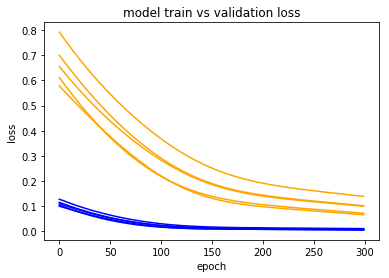

In [20]:
# plot train and validation loss across multiple runs considering stochastic phenomenon
pyplot.plot(train, color='blue', label='train')
pyplot.plot(validation, color='orange', label='validation')
pyplot.title('model train vs validation loss')
pyplot.ylabel('loss')
pyplot.xlabel('epoch')
pyplot.show()

<hr/>